<a href="https://colab.research.google.com/github/baek-sy/dustdata/blob/main/dustdecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 서울시 대기질 자료 제공_2020-2021.csv to 서울시 대기질 자료 제공_2020-2021.csv


In [ ]:
import pandas as pd
data=pd.read_csv('data.csv',encoding='cp949')
data

일시   구분  미세먼지(PM10)  초미세먼지(PM25)
0       2021-05-31 23:00   평균        43.0         23.0
1       2021-05-31 23:00  강남구        42.0         24.0
2       2021-05-31 23:00  강동구        47.0         30.0
3       2021-05-31 23:00  강북구        48.0         27.0
4       2021-05-31 23:00  강서구        49.0         28.0
...                  ...  ...         ...          ...
322601   2020-01-01 0:00  용산구        12.0         13.0
322602   2020-01-01 0:00  은평구        18.0         12.0
322603   2020-01-01 0:00  종로구        20.0         15.0
322604   2020-01-01 0:00   중구        22.0         18.0
322605   2020-01-01 0:00  중랑구        22.0         10.0

[322606 rows x 4 columns]

In [ ]:
data['일시']

0         2021-05-31 23:00
1         2021-05-31 23:00
2         2021-05-31 23:00
3         2021-05-31 23:00
4         2021-05-31 23:00
                ...       
322601     2020-01-01 0:00
322602     2020-01-01 0:00
322603     2020-01-01 0:00
322604     2020-01-01 0:00
322605     2020-01-01 0:00
Name: 일시, Length: 322606, dtype: object

In [ ]:
pd.to_datetime(data['일시'])

0        2021-05-31 23:00:00
1        2021-05-31 23:00:00
2        2021-05-31 23:00:00
3        2021-05-31 23:00:00
4        2021-05-31 23:00:00
                 ...        
322601   2020-01-01 00:00:00
322602   2020-01-01 00:00:00
322603   2020-01-01 00:00:00
322604   2020-01-01 00:00:00
322605   2020-01-01 00:00:00
Name: 일시, Length: 322606, dtype: datetime64[ns]

In [ ]:
data['날짜']=pd.to_datetime(data['일시'])

data['날짜_년도']=data['날짜'].dt.year
data['날짜_월']=data['날짜'].dt.month
data['날짜_시간']=data['날짜'].dt.hour

data

일시   구분  미세먼지(PM10)  ...  날짜_년도 날짜_월  날짜_시간
0       2021-05-31 23:00   평균        43.0  ...   2021    5     23
1       2021-05-31 23:00  강남구        42.0  ...   2021    5     23
2       2021-05-31 23:00  강동구        47.0  ...   2021    5     23
3       2021-05-31 23:00  강북구        48.0  ...   2021    5     23
4       2021-05-31 23:00  강서구        49.0  ...   2021    5     23
...                  ...  ...         ...  ...    ...  ...    ...
322601   2020-01-01 0:00  용산구        12.0  ...   2020    1      0
322602   2020-01-01 0:00  은평구        18.0  ...   2020    1      0
322603   2020-01-01 0:00  종로구        20.0  ...   2020    1      0
322604   2020-01-01 0:00   중구        22.0  ...   2020    1      0
322605   2020-01-01 0:00  중랑구        22.0  ...   2020    1      0

[322606 rows x 8 columns]

In [ ]:
data_del=data.drop(['일시','날짜'],axis=1)
data_del

구분  미세먼지(PM10)  초미세먼지(PM25)  날짜_년도  날짜_월  날짜_시간
0        평균        43.0         23.0   2021     5     23
1       강남구        42.0         24.0   2021     5     23
2       강동구        47.0         30.0   2021     5     23
3       강북구        48.0         27.0   2021     5     23
4       강서구        49.0         28.0   2021     5     23
...     ...         ...          ...    ...   ...    ...
322601  용산구        12.0         13.0   2020     1      0
322602  은평구        18.0         12.0   2020     1      0
322603  종로구        20.0         15.0   2020     1      0
322604   중구        22.0         18.0   2020     1      0
322605  중랑구        22.0         10.0   2020     1      0

[322606 rows x 6 columns]

In [ ]:
data_del.loc[data_del['날짜_시간']>=18,'시간대']='야간'
data_del.loc[(data_del['날짜_시간']>=6) & (data_del['날짜_시간']<18),'시간대']='주간'
data_del.loc[(data_del['날짜_시간']>=0) & (data_del['날짜_시간']<6),'시간대']='새벽'
data_del


구분  미세먼지(PM10)  초미세먼지(PM25)  날짜_년도  날짜_월  날짜_시간 시간대
0        평균        43.0         23.0   2021     5     23  야간
1       강남구        42.0         24.0   2021     5     23  야간
2       강동구        47.0         30.0   2021     5     23  야간
3       강북구        48.0         27.0   2021     5     23  야간
4       강서구        49.0         28.0   2021     5     23  야간
...     ...         ...          ...    ...   ...    ...  ..
322601  용산구        12.0         13.0   2020     1      0  새벽
322602  은평구        18.0         12.0   2020     1      0  새벽
322603  종로구        20.0         15.0   2020     1      0  새벽
322604   중구        22.0         18.0   2020     1      0  새벽
322605  중랑구        22.0         10.0   2020     1      0  새벽

[322606 rows x 7 columns]

In [ ]:
data_del.loc[data_del['날짜_월']>=10,'분기']='4사분기'
data_del.loc[(data_del['날짜_월']>=7) & (data_del['날짜_월']<10),'분기']='3사분기'
data_del.loc[(data_del['날짜_월']>=4) & (data_del['날짜_월']<7),'분기']='2사분기'
data_del.loc[(data_del['날짜_월']>=1) & (data_del['날짜_월']<4),'분기']='1사분기'
data_del

구분  미세먼지(PM10)  초미세먼지(PM25)  날짜_년도  날짜_월  날짜_시간 시간대    분기
0        평균        43.0         23.0   2021     5     23  야간  2사분기
1       강남구        42.0         24.0   2021     5     23  야간  2사분기
2       강동구        47.0         30.0   2021     5     23  야간  2사분기
3       강북구        48.0         27.0   2021     5     23  야간  2사분기
4       강서구        49.0         28.0   2021     5     23  야간  2사분기
...     ...         ...          ...    ...   ...    ...  ..   ...
322601  용산구        12.0         13.0   2020     1      0  새벽  1사분기
322602  은평구        18.0         12.0   2020     1      0  새벽  1사분기
322603  종로구        20.0         15.0   2020     1      0  새벽  1사분기
322604   중구        22.0         18.0   2020     1      0  새벽  1사분기
322605  중랑구        22.0         10.0   2020     1      0  새벽  1사분기

[322606 rows x 8 columns]

In [ ]:
data_del.loc[(data_del['미세먼지(PM10)']>=151)|data_del['초미세먼지(PM25)']>=76,'미세먼지예보등급']='매우나쁨'
data_del.loc[((data_del['미세먼지(PM10)']>=81)&(data_del['미세먼지(PM10)']<151))|((data_del['초미세먼지(PM25)']>=36)&(data_del['초미세먼지(PM25)']<76)),'미세먼지예보등급']='나쁨'
data_del.loc[((data_del['미세먼지(PM10)']>=31)&(data_del['미세먼지(PM10)']<81))|((data_del['초미세먼지(PM25)']>=16)&(data_del['초미세먼지(PM25)']<36)),'미세먼지예보등급']='보통'
data_del.loc[((data_del['미세먼지(PM10)']>=0)&(data_del['미세먼지(PM10)']<31))|((data_del['초미세먼지(PM25)']>=0)&(data_del['초미세먼지(PM25)']<16)),'미세먼지예보등급']='좋음'
data_del

구분  미세먼지(PM10)  초미세먼지(PM25)  날짜_년도  날짜_월  날짜_시간 시간대    분기 미세먼지예보등급
0        평균        43.0         23.0   2021     5     23  야간  2사분기       보통
1       강남구        42.0         24.0   2021     5     23  야간  2사분기       보통
2       강동구        47.0         30.0   2021     5     23  야간  2사분기       보통
3       강북구        48.0         27.0   2021     5     23  야간  2사분기       보통
4       강서구        49.0         28.0   2021     5     23  야간  2사분기       보통
...     ...         ...          ...    ...   ...    ...  ..   ...      ...
322601  용산구        12.0         13.0   2020     1      0  새벽  1사분기       좋음
322602  은평구        18.0         12.0   2020     1      0  새벽  1사분기       좋음
322603  종로구        20.0         15.0   2020     1      0  새벽  1사분기       좋음
322604   중구        22.0         18.0   2020     1      0  새벽  1사분기       좋음
322605  중랑구        22.0         10.0   2020     1      0  새벽  1사분기       좋음

[322606 rows x 9 columns]

In [ ]:
print('매우나쁨' in data_del)

False


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image

import numpy as np
!pip install pydotplus
import pydotplus

In [ ]:
data_del_2=data_del.drop(['미세먼지(PM10)','초미세먼지(PM25)'],axis=1)
data_del_2

구분  날짜_년도  날짜_월  날짜_시간 시간대    분기 미세먼지예보등급
0        평균   2021     5     23  야간  2사분기       보통
1       강남구   2021     5     23  야간  2사분기       보통
2       강동구   2021     5     23  야간  2사분기       보통
3       강북구   2021     5     23  야간  2사분기       보통
4       강서구   2021     5     23  야간  2사분기       보통
...     ...    ...   ...    ...  ..   ...      ...
322601  용산구   2020     1      0  새벽  1사분기       좋음
322602  은평구   2020     1      0  새벽  1사분기       좋음
322603  종로구   2020     1      0  새벽  1사분기       좋음
322604   중구   2020     1      0  새벽  1사분기       좋음
322605  중랑구   2020     1      0  새벽  1사분기       좋음

[322606 rows x 7 columns]

In [ ]:
dummy=pd.get_dummies(data_del_2['구분'])
data_del_2

구분  날짜_년도  날짜_월  날짜_시간 시간대    분기 미세먼지예보등급
0        평균   2021     5     23  야간  2사분기       보통
1       강남구   2021     5     23  야간  2사분기       보통
2       강동구   2021     5     23  야간  2사분기       보통
3       강북구   2021     5     23  야간  2사분기       보통
4       강서구   2021     5     23  야간  2사분기       보통
...     ...    ...   ...    ...  ..   ...      ...
322601  용산구   2020     1      0  새벽  1사분기       좋음
322602  은평구   2020     1      0  새벽  1사분기       좋음
322603  종로구   2020     1      0  새벽  1사분기       좋음
322604   중구   2020     1      0  새벽  1사분기       좋음
322605  중랑구   2020     1      0  새벽  1사분기       좋음

[322606 rows x 7 columns]

In [ ]:
new_data=pd.concat([data_del_2,dummy],axis=1)
new_data

구분  날짜_년도  날짜_월  날짜_시간 시간대    분기  ... 용산구  은평구  종로구  중구  중랑구  평균
0        평균   2021     5     23  야간  2사분기  ...   0    0    0   0    0   1
1       강남구   2021     5     23  야간  2사분기  ...   0    0    0   0    0   0
2       강동구   2021     5     23  야간  2사분기  ...   0    0    0   0    0   0
3       강북구   2021     5     23  야간  2사분기  ...   0    0    0   0    0   0
4       강서구   2021     5     23  야간  2사분기  ...   0    0    0   0    0   0
...     ...    ...   ...    ...  ..   ...  ...  ..  ...  ...  ..  ...  ..
322601  용산구   2020     1      0  새벽  1사분기  ...   1    0    0   0    0   0
322602  은평구   2020     1      0  새벽  1사분기  ...   0    1    0   0    0   0
322603  종로구   2020     1      0  새벽  1사분기  ...   0    0    1   0    0   0
322604   중구   2020     1      0  새벽  1사분기  ...   0    0    0   1    0   0
322605  중랑구   2020     1      0  새벽  1사분기  ...   0    0    0   0    1   0

[322606 rows x 33 columns]

In [ ]:
dummy=pd.get_dummies(data_del_2['시간대'])
new_data=pd.concat([new_data,dummy],axis=1)
new_data

구분  날짜_년도  날짜_월  날짜_시간 시간대    분기  ... 중구  중랑구  평균  새벽  야간  주간
0        평균   2021     5     23  야간  2사분기  ...  0    0   1   0   1   0
1       강남구   2021     5     23  야간  2사분기  ...  0    0   0   0   1   0
2       강동구   2021     5     23  야간  2사분기  ...  0    0   0   0   1   0
3       강북구   2021     5     23  야간  2사분기  ...  0    0   0   0   1   0
4       강서구   2021     5     23  야간  2사분기  ...  0    0   0   0   1   0
...     ...    ...   ...    ...  ..   ...  ... ..  ...  ..  ..  ..  ..
322601  용산구   2020     1      0  새벽  1사분기  ...  0    0   0   1   0   0
322602  은평구   2020     1      0  새벽  1사분기  ...  0    0   0   1   0   0
322603  종로구   2020     1      0  새벽  1사분기  ...  0    0   0   1   0   0
322604   중구   2020     1      0  새벽  1사분기  ...  1    0   0   1   0   0
322605  중랑구   2020     1      0  새벽  1사분기  ...  0    1   0   1   0   0

[322606 rows x 36 columns]

In [ ]:
dummy=pd.get_dummies(data_del_2['분기'])
new_data=pd.concat([new_data,dummy],axis=1)
new_data

구분  날짜_년도  날짜_월  날짜_시간 시간대    분기  ... 야간  주간  1사분기  2사분기  3사분기  4사분기
0        평균   2021     5     23  야간  2사분기  ...  1   0     0     1     0     0
1       강남구   2021     5     23  야간  2사분기  ...  1   0     0     1     0     0
2       강동구   2021     5     23  야간  2사분기  ...  1   0     0     1     0     0
3       강북구   2021     5     23  야간  2사분기  ...  1   0     0     1     0     0
4       강서구   2021     5     23  야간  2사분기  ...  1   0     0     1     0     0
...     ...    ...   ...    ...  ..   ...  ... ..  ..   ...   ...   ...   ...
322601  용산구   2020     1      0  새벽  1사분기  ...  0   0     1     0     0     0
322602  은평구   2020     1      0  새벽  1사분기  ...  0   0     1     0     0     0
322603  종로구   2020     1      0  새벽  1사분기  ...  0   0     1     0     0     0
322604   중구   2020     1      0  새벽  1사분기  ...  0   0     1     0     0     0
322605  중랑구   2020     1      0  새벽  1사분기  ...  0   0     1     0     0     0

[322606 rows x 40 columns]

In [ ]:
dummy=pd.get_dummies(data_del_2['미세먼지예보등급'])
new_data=pd.concat([new_data,dummy],axis=1)
new_data
new_data=new_data.drop(['분기','시간대','미세먼지예보등급','구분'],axis=1)
#미세먼지예보등급을 숫자로 해야하나?
new_data

날짜_년도  날짜_월  날짜_시간  강남구  강동구  강북구  ...  2사분기  3사분기  4사분기  나쁨  보통  좋음
0        2021     5     23    0    0    0  ...     1     0     0   0   1   0
1        2021     5     23    1    0    0  ...     1     0     0   0   1   0
2        2021     5     23    0    1    0  ...     1     0     0   0   1   0
3        2021     5     23    0    0    1  ...     1     0     0   0   1   0
4        2021     5     23    0    0    0  ...     1     0     0   0   1   0
...       ...   ...    ...  ...  ...  ...  ...   ...   ...   ...  ..  ..  ..
322601   2020     1      0    0    0    0  ...     0     0     0   0   0   1
322602   2020     1      0    0    0    0  ...     0     0     0   0   0   1
322603   2020     1      0    0    0    0  ...     0     0     0   0   0   1
322604   2020     1      0    0    0    0  ...     0     0     0   0   0   1
322605   2020     1      0    0    0    0  ...     0     0     0   0   0   1

[322606 rows x 39 columns]

In [ ]:
x=np.array(pd.DataFrame(new_data, columns=['날짜_년도','날짜_월', '날짜_시간', '강남구',	'강동구',	'강북구',	'강서구',	'관악구',	'광진구',	'구로구',	
                                           '금천구',	'노원구',	'도봉구',	'동대문구',	'동작구',	'마포구',	'서대문구',	'서초구',	'성동구',	'성북구',	
                                           '송파구',	'양천구',	'영등포구',	'용산구',	'은평구',	'종로구',	'중구',	'중랑구',	'평균',	
                                           '새벽',	'야간',	'주간',	'1사분기',	'2사분기',	'3사분기',	'4사분기']))
y=np.array(pd.DataFrame(new_data, columns=['좋음','보통','나쁨']))
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
x_train

array([[2020,    1,    7, ...,    0,    0,    0],
       [2021,    2,   17, ...,    0,    0,    0],
       [2020,    8,   14, ...,    0,    1,    0],
       ...,
       [2021,    4,    1, ...,    1,    0,    0],
       [2020,   11,    7, ...,    0,    0,    1],
       [2020,    9,   22, ...,    0,    1,    0]])

In [ ]:
x_test

array([[2020,    8,    3, ...,    0,    1,    0],
       [2021,    2,   18, ...,    0,    0,    0],
       [2020,    9,   18, ...,    0,    1,    0],
       ...,
       [2021,    4,    0, ...,    1,    0,    0],
       [2020,    6,   19, ...,    1,    0,    0],
       [2020,    3,    9, ...,    0,    0,    0]])

In [ ]:
y_train

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [ ]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train,y_train)
dt_prediction=dt_clf.predict(x_test)

In [ ]:
## using graphviz 
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
## 아래 있는것은 필수는 아닌데, 가끔 에러가 생길 때가 있어서, 그냥 같이 해줌. 
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2

In [ ]:
import graphviz

In [ ]:
feature_names=new_data.columns.tolist()
feature_names=feature_names[0:36]
target_names=np.array(['좋음','보통','나쁨'])

In [ ]:

dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_names,
                                  filled = True, rounded = True,
                                  special_characters = True)
#dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
#Image(dt_graph.create_png())
#위는 그래프 이미지 파일화 한글깨짐
graph = graphviz.Source(dt_dot_data)  
graph

In [ ]:
prun = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 2)
prun.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

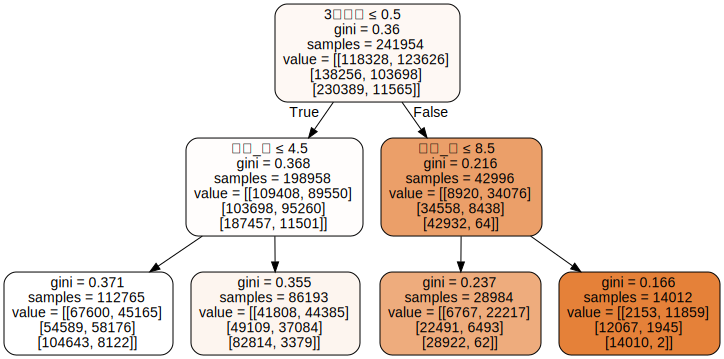

In [ ]:
dt_dot_data_2 = tree.export_graphviz(prun,               # 의사나무 모형 대입
                               out_file = None,        # file로 변환할 것인가
                               feature_names = feature_names,  # feature 이름
                               class_names = target_names,   # target 이름
                               filled = True,          # 그림에 색상을 넣을것인가
                               rounded = True,         # 반올림을 진행할 것인가
                               special_characters = True)  # 특수문자를 사용하나

graph_2 = graphviz.Source(dt_dot_data_2)  
graph_2

In [ ]:
prun_2 = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 5)
prun_2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

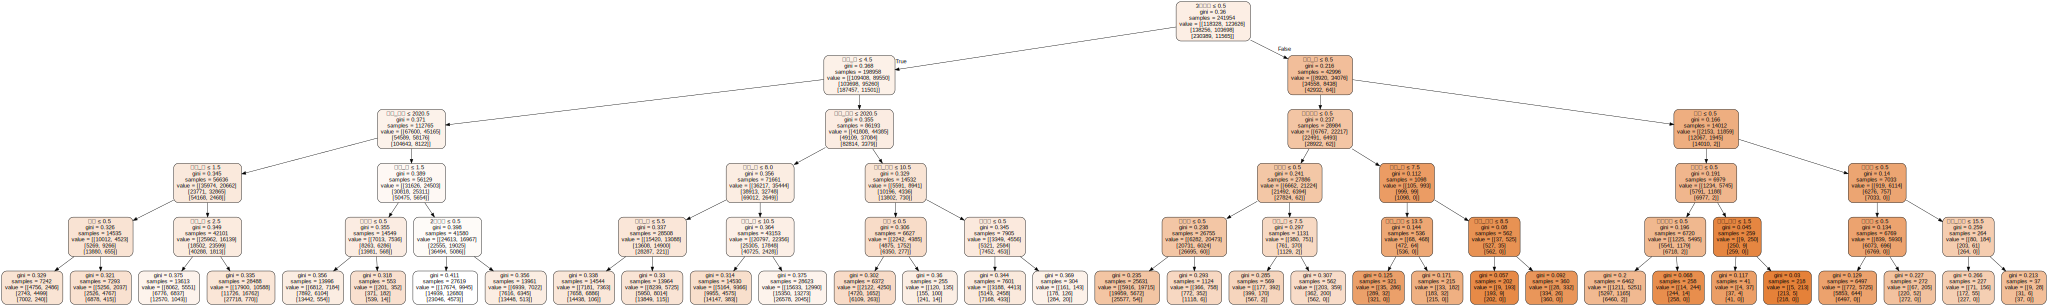

In [ ]:
dt_dot_data_3 = tree.export_graphviz(prun_2,               # 의사나무 모형 대입
                               out_file = None,        # file로 변환할 것인가
                               feature_names = feature_names,  # feature 이름
                               class_names = target_names,   # target 이름
                               filled = True,          # 그림에 색상을 넣을것인가
                               rounded = True,         # 반올림을 진행할 것인가
                               special_characters = True)  # 특수문자를 사용하나

graph_3 = graphviz.Source(dt_dot_data_3)  
graph_3

#dt_graph_3 = pydotplus.graph_from_dot_data(dt_dot_data_3)
#Image(dt_graph_3.create_png())

In [ ]:
prun.score(x_test,y_test)

0.5647230465295056

In [ ]:
prun_2.score(x_test, y_test)

0.4793805485294847

In [ ]:
prun_e = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 2)
prun_e.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

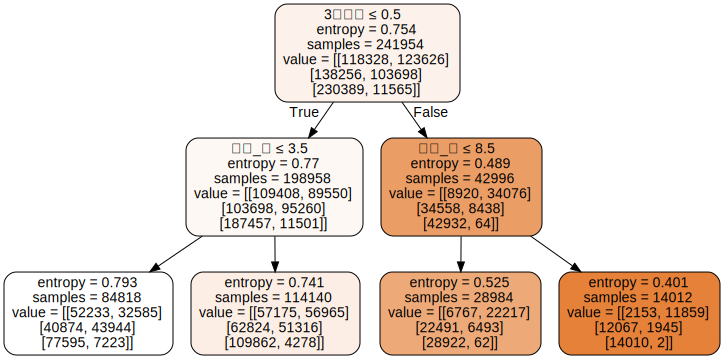

In [ ]:
dt_dot_data_e = tree.export_graphviz(prun_e,               # 의사나무 모형 대입
                               out_file = None,        # file로 변환할 것인가
                               feature_names = feature_names,  # feature 이름
                               class_names = target_names,   # target 이름
                               filled = True,          # 그림에 색상을 넣을것인가
                               rounded = True,         # 반올림을 진행할 것인가
                               special_characters = True)  # 특수문자를 사용하나

graph_e = graphviz.Source(dt_dot_data_e)  
graph_e


In [ ]:
prun_e_2 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
prun_e_2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

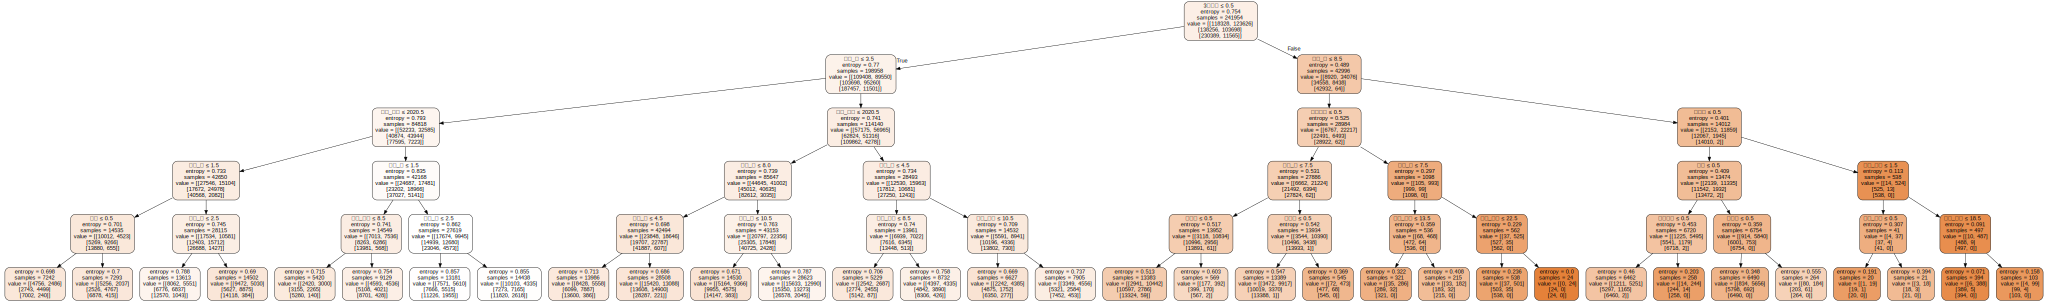

In [ ]:
dt_dot_data_e_2 = tree.export_graphviz(prun_e_2,               # 의사나무 모형 대입
                               out_file = None,        # file로 변환할 것인가
                               feature_names = feature_names,  # feature 이름
                               class_names = target_names,   # target 이름
                               filled = True,          # 그림에 색상을 넣을것인가
                               rounded = True,         # 반올림을 진행할 것인가
                               special_characters = True)  # 특수문자를 사용하나

graph_e_2 = graphviz.Source(dt_dot_data_e_2)  
graph_e_2
#dt_graph_e_2 = pydotplus.graph_from_dot_data(dt_dot_data_e_2)
#Image(dt_graph_e_2.create_png())

In [ ]:
prun_e.score(x_test,y_test)

0.3268114863859545

In [ ]:
prun_e_2.score(x_test,y_test)

0.44074542478797796

In [ ]:
prun_e_3 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 7)
prun_e_3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

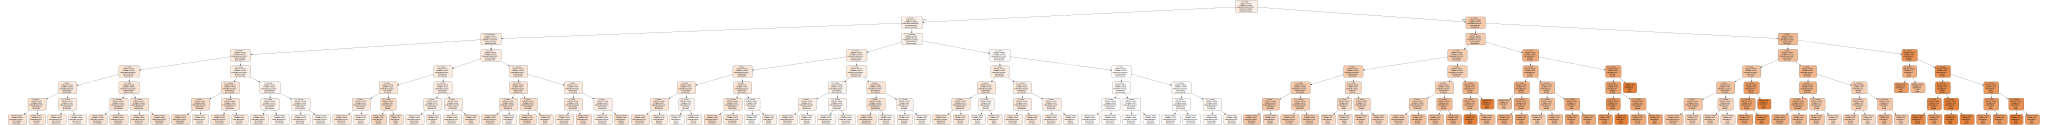

In [ ]:
dt_dot_data_e_3 = tree.export_graphviz(prun_e_3,               # 의사나무 모형 대입
                               out_file = None,        # file로 변환할 것인가
                               feature_names = feature_names,  # feature 이름
                               class_names = target_names,   # target 이름
                               filled = True,          # 그림에 색상을 넣을것인가
                               rounded = True,         # 반올림을 진행할 것인가
                               special_characters = True)  # 특수문자를 사용하나

graph_e_3 = graphviz.Source(dt_dot_data_e_3)  
graph_e_3
#dt_graph_e_3 = pydotplus.graph_from_dot_data(dt_dot_data_e_3)
#Image(dt_graph_e_3.create_png())

In [ ]:
prun_e_3.score(x_test,y_test)

0.475636066061598

In [ ]:
prun_e_4 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 15)
prun_e_4.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_dot_data_e_4 = tree.export_graphviz(prun_e_4,               # 의사나무 모형 대입
                               out_file = None,        # file로 변환할 것인가
                               feature_names = feature_names,  # feature 이름
                               class_names = target_names,   # target 이름
                               filled = True,          # 그림에 색상을 넣을것인가
                               rounded = True,         # 반올림을 진행할 것인가
                               special_characters = True)  # 특수문자를 사용하나

graph_e_4 = graphviz.Source(dt_dot_data_e_4)  
graph_e_4
#dt_graph_e_4 = pydotplus.graph_from_dot_data(dt_dot_data_e_4)
#Image(dt_graph_e_4.create_png())

In [ ]:
prun_e_4.score(x_test,y_test)

0.49655309229777317